# 1.权值初始化

Q:梯度爆炸的代码演示？

In [6]:
import torch
import random
import numpy as np
import torch.nn as nn
from utils.common_tools import set_seed

set_seed(1)  # 设置随机种子

class MLP(nn.Module):
    def __init__(self, neural_num, layers):
        super(MLP, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(neural_num, neural_num, bias=False) for i in range(layers)])
        self.neural_num = neural_num

    def forward(self, x):
        for (i, linear) in enumerate(self.linears):
            x = linear(x)

            print("layer:{}, std:{}".format(i, x.std()))
            if torch.isnan(x.std()):
                print("output is nan in {} layers".format(i))
                break

        return x

    def initialize(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight.data)    # normal: mean=0, std=1

# 100层神经网络
layer_nums = 100
# 每一层神经元数为256
neural_nums = 256
batch_size = 16

net = MLP(neural_nums, layer_nums)
net.initialize()

inputs = torch.randn((batch_size, neural_nums))  # normal: mean=0, std=1

output = net(inputs)
print(output)

layer:0, std:15.959932327270508
layer:1, std:256.6237487792969
layer:2, std:4107.24560546875
layer:3, std:65576.8125
layer:4, std:1045011.875
layer:5, std:17110408.0
layer:6, std:275461408.0
layer:7, std:4402537984.0
layer:8, std:71323615232.0
layer:9, std:1148104736768.0
layer:10, std:17911758454784.0
layer:11, std:283574846619648.0
layer:12, std:4480599809064960.0
layer:13, std:7.196814275405414e+16
layer:14, std:1.1507761512626258e+18
layer:15, std:1.853110740188555e+19
layer:16, std:2.9677725826641455e+20
layer:17, std:4.780376223769898e+21
layer:18, std:7.613223480799065e+22
layer:19, std:1.2092652108825478e+24
layer:20, std:1.923257075956356e+25
layer:21, std:3.134467063655912e+26
layer:22, std:5.014437766285408e+27
layer:23, std:8.066615144249704e+28
layer:24, std:1.2392661553516338e+30
layer:25, std:1.9455688099759845e+31
layer:26, std:3.0238180658999113e+32
layer:27, std:4.950357571077011e+33
layer:28, std:8.150925520353362e+34
layer:29, std:1.322983152787379e+36
layer:30, std

Q:更改初始权值解决不带激活函数全连接网络的梯度爆炸问题？

In [8]:
import torch
import random
import numpy as np
import torch.nn as nn
from utils.common_tools import set_seed

set_seed(1)  # 设置随机种子

class MLP(nn.Module):
    def __init__(self, neural_num, layers):
        super(MLP, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(neural_num, neural_num, bias=False) for i in range(layers)])
        self.neural_num = neural_num

    def forward(self, x):
        for (i, linear) in enumerate(self.linears):
            x = linear(x)

            print("layer:{}, std:{}".format(i, x.std()))
            if torch.isnan(x.std()):
                print("output is nan in {} layers".format(i))
                break

        return x

    def initialize(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # 注意此处的std
                nn.init.normal_(m.weight.data, std=np.sqrt(1/self.neural_num))    # normal: mean=0, std=1

# 100层神经网络
layer_nums = 100
# 每一层神经元数为256
neural_nums = 256
batch_size = 16

net = MLP(neural_nums, layer_nums)
net.initialize()

inputs = torch.randn((batch_size, neural_nums))  # normal: mean=0, std=1

output = net(inputs)
print(output)

layer:0, std:0.9974957704544067
layer:1, std:1.0024365186691284
layer:2, std:1.002745509147644
layer:3, std:1.0006227493286133
layer:4, std:0.9966009855270386
layer:5, std:1.019859790802002
layer:6, std:1.026173710823059
layer:7, std:1.0250457525253296
layer:8, std:1.0378952026367188
layer:9, std:1.0441951751708984
layer:10, std:1.0181655883789062
layer:11, std:1.0074602365493774
layer:12, std:0.9948930144309998
layer:13, std:0.9987586140632629
layer:14, std:0.9981392025947571
layer:15, std:1.0045733451843262
layer:16, std:1.0055204629898071
layer:17, std:1.0122840404510498
layer:18, std:1.0076017379760742
layer:19, std:1.000280737876892
layer:20, std:0.9943006038665771
layer:21, std:1.012800931930542
layer:22, std:1.012657642364502
layer:23, std:1.018149971961975
layer:24, std:0.9776086211204529
layer:25, std:0.9592394828796387
layer:26, std:0.9317858815193176
layer:27, std:0.9534041881561279
layer:28, std:0.9811319708824158
layer:29, std:0.9953019022941589
layer:30, std:0.97739160060

Q:添加tanh激活函数后的全连接网络，梯度消失代码示例

In [9]:
import torch
import random
import numpy as np
import torch.nn as nn
from utils.common_tools import set_seed

set_seed(1)  # 设置随机种子

class MLP(nn.Module):
    def __init__(self, neural_num, layers):
        super(MLP, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(neural_num, neural_num, bias=False) for i in range(layers)])
        self.neural_num = neural_num

    def forward(self, x):
        for (i, linear) in enumerate(self.linears):
            x = linear(x)
            # 多添加了tanh激活函数
            x = torch.tanh(x)

            print("layer:{}, std:{}".format(i, x.std()))
            if torch.isnan(x.std()):
                print("output is nan in {} layers".format(i))
                break

        return x

    def initialize(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # 注意此处的std
                nn.init.normal_(m.weight.data, std=np.sqrt(1/self.neural_num))    # normal: mean=0, std=1

                # a = np.sqrt(6 / (self.neural_num + self.neural_num))
                #
                # tanh_gain = nn.init.calculate_gain('tanh')
                # a *= tanh_gain
                #
                # nn.init.uniform_(m.weight.data, -a, a)

                # nn.init.xavier_uniform_(m.weight.data, gain=tanh_gain)

                # nn.init.normal_(m.weight.data, std=np.sqrt(2 / self.neural_num))
#                 nn.init.kaiming_normal_(m.weight.data)

# 100层神经网络
layer_nums = 100
# 每一层神经元数为256
neural_nums = 256
batch_size = 16

net = MLP(neural_nums, layer_nums)
net.initialize()

inputs = torch.randn((batch_size, neural_nums))  # normal: mean=0, std=1

output = net(inputs)
print(output)

layer:0, std:0.6273701786994934
layer:1, std:0.48910173773765564
layer:2, std:0.4099564850330353
layer:3, std:0.35637012124061584
layer:4, std:0.32117360830307007
layer:5, std:0.2981105148792267
layer:6, std:0.27730831503868103
layer:7, std:0.2589356303215027
layer:8, std:0.2468511462211609
layer:9, std:0.23721906542778015
layer:10, std:0.22171513736248016
layer:11, std:0.21079954504966736
layer:12, std:0.19820132851600647
layer:13, std:0.19069305062294006
layer:14, std:0.18555502593517303
layer:15, std:0.17953835427761078
layer:16, std:0.17485806345939636
layer:17, std:0.1702701896429062
layer:18, std:0.16508983075618744
layer:19, std:0.1591130942106247
layer:20, std:0.15480300784111023
layer:21, std:0.15263864398002625
layer:22, std:0.148549422621727
layer:23, std:0.14617665112018585
layer:24, std:0.13876432180404663
layer:25, std:0.13316625356674194
layer:26, std:0.12660598754882812
layer:27, std:0.12537942826747894
layer:28, std:0.12535445392131805
layer:29, std:0.12589804828166962

Q:使用Xavier初始化tanh激活函数的全连接网络解决梯度消失问题的代码示例？

In [10]:
import torch
import random
import numpy as np
import torch.nn as nn
from utils.common_tools import set_seed

set_seed(1)  # 设置随机种子

class MLP(nn.Module):
    def __init__(self, neural_num, layers):
        super(MLP, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(neural_num, neural_num, bias=False) for i in range(layers)])
        self.neural_num = neural_num

    def forward(self, x):
        for (i, linear) in enumerate(self.linears):
            x = linear(x)
            # 多添加了tanh激活函数
            x = torch.tanh(x)

            print("layer:{}, std:{}".format(i, x.std()))
            if torch.isnan(x.std()):
                print("output is nan in {} layers".format(i))
                break

        return x

    def initialize(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # 手动计算xavier
                a = np.sqrt(6 / (self.neural_num + self.neural_num))
                tanh_gain = nn.init.calculate_gain('tanh')
                a *= tanh_gain
                nn.init.uniform_(m.weight.data, -a, a)
                # pytorch提供的xavier初始化方法，效果同上
                # tanh_gain = nn.init.calculate_gain('tanh')
                # nn.init.xavier_uniform_(m.weight.data, gain=tanh_gain)

                # nn.init.normal_(m.weight.data, std=np.sqrt(2 / self.neural_num))
#                 nn.init.kaiming_normal_(m.weight.data)

# 100层神经网络
layer_nums = 100
# 每一层神经元数为256
neural_nums = 256
batch_size = 16

net = MLP(neural_nums, layer_nums)
net.initialize()

inputs = torch.randn((batch_size, neural_nums))  # normal: mean=0, std=1

output = net(inputs)
print(output)

layer:0, std:0.7571136355400085
layer:1, std:0.6924336552619934
layer:2, std:0.6677976846694946
layer:3, std:0.6551960110664368
layer:4, std:0.655646800994873
layer:5, std:0.6536089777946472
layer:6, std:0.6500504612922668
layer:7, std:0.6465446949005127
layer:8, std:0.6456685662269592
layer:9, std:0.6414617896080017
layer:10, std:0.6423627734184265
layer:11, std:0.6509683728218079
layer:12, std:0.6584846377372742
layer:13, std:0.6530249118804932
layer:14, std:0.6528729796409607
layer:15, std:0.6523412466049194
layer:16, std:0.6534921526908875
layer:17, std:0.6540238261222839
layer:18, std:0.6477403044700623
layer:19, std:0.6469652652740479
layer:20, std:0.6441705822944641
layer:21, std:0.6484488248825073
layer:22, std:0.6512865424156189
layer:23, std:0.6525684595108032
layer:24, std:0.6531476378440857
layer:25, std:0.6488809585571289
layer:26, std:0.6533839702606201
layer:27, std:0.6482065320014954
layer:28, std:0.6471589803695679
layer:29, std:0.6553042531013489
layer:30, std:0.65608

In [ ]:
Q:使用He初始化(Kaiming)relu激活函数的全连接网络解决梯度消失问题的代码示例？

In [13]:
import torch
import random
import numpy as np
import torch.nn as nn
from utils.common_tools import set_seed

set_seed(1)  # 设置随机种子

class MLP(nn.Module):
    def __init__(self, neural_num, layers):
        super(MLP, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(neural_num, neural_num, bias=False) for i in range(layers)])
        self.neural_num = neural_num

    def forward(self, x):
        for (i, linear) in enumerate(self.linears):
            x = linear(x)
            # 多添加了relu激活函数
            x = torch.relu(x)

            print("layer:{}, std:{}".format(i, x.std()))
            if torch.isnan(x.std()):
                print("output is nan in {} layers".format(i))
                break

        return x

    def initialize(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                # 手动计算kaiming初始化
                nn.init.normal_(m.weight.data, std=np.sqrt(2 / self.neural_num))
                # pytorch官方提供kaiming初始化
                # nn.init.kaiming_normal_(m.weight.data)

# 100层神经网络
layer_nums = 100
# 每一层神经元数为256
neural_nums = 256
batch_size = 16

net = MLP(neural_nums, layer_nums)
net.initialize()

inputs = torch.randn((batch_size, neural_nums))  # normal: mean=0, std=1

output = net(inputs)
print(output)

layer:0, std:0.826629638671875
layer:1, std:0.8786815404891968
layer:2, std:0.9134422540664673
layer:3, std:0.8892471194267273
layer:4, std:0.834428071975708
layer:5, std:0.874537467956543
layer:6, std:0.7926971316337585
layer:7, std:0.7806458473205566
layer:8, std:0.8684563636779785
layer:9, std:0.9434137344360352
layer:10, std:0.964215874671936
layer:11, std:0.8896796107292175
layer:12, std:0.8287257552146912
layer:13, std:0.8519769906997681
layer:14, std:0.8354345560073853
layer:15, std:0.802306056022644
layer:16, std:0.8613607287406921
layer:17, std:0.7583686709403992
layer:18, std:0.8120225071907043
layer:19, std:0.791111171245575
layer:20, std:0.7164372801780701
layer:21, std:0.778393030166626
layer:22, std:0.8672043085098267
layer:23, std:0.874812662601471
layer:24, std:0.9020991325378418
layer:25, std:0.8585715889930725
layer:26, std:0.7824353575706482
layer:27, std:0.7968912720680237
layer:28, std:0.8984369039535522
layer:29, std:0.8704465627670288
layer:30, std:0.986047327518

Q:如何计算激活函数的方差变化尺度？
- `torch.nn.init.calculate_gain(nonlinearity, param=None)`
- nonlinearity：激活函数名称
- param：激活函数的参数，如Leaky ReLU的negative_slop

Q:calculate_gain代码示例？

In [1]:
import torch
import torch.nn as nn

# 数据
x = torch.randn(10000)
out = torch.tanh(x)

# 得到标准差的尺度变化，即缩放比例
gain = x.std() / out.std()
print('gain:{}'.format(gain))

# pytorch计算tanh的增益
tanh_gain = nn.init.calculate_gain('tanh')
print('tanh_gain in PyTorch:', tanh_gain)

gain:1.5827221870422363
tanh_gain in PyTorch: 1.6666666666666667


# 2.损失函数（一）

Q:如何进行交叉熵计算？
- `torch.nn.CrossEntropyLoss(weight: Optional[torch.Tensor] = None, size_average=None, ignore_index: int = -100, reduce=None, reduction: str = 'mean')`
- nn.LogSoftmax()与nn.NLLLoss()结合
- weight：各类别的loss设置权值
- ignore_index：忽略某个类别
- reduction：计算模式，可为none/sum/mean
    - none：逐个元素计算
    - sum：所有元素求和，返回标量
    - mean：加权平均，返回标量
- 忽略size_average和reduce两个字段，后续会废除


Q:人民币分类模型代码演示

In [15]:
"""
# @file name  : 1_split_dataset.py
# @author     : TingsongYu https://github.com/TingsongYu
# @date       : 2020-07-24 10:08:00
# @brief      : 将数据集划分为训练集，验证集，测试集
"""

import os
import random
import shutil


def makedir(new_dir):
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)


if __name__ == '__main__':

    dataset_dir = os.path.abspath(os.path.join("data", "RMB_data"))
    split_dir = os.path.abspath(os.path.join("data", "rmb_split"))
    train_dir = os.path.join(split_dir, "train")
    valid_dir = os.path.join(split_dir, "valid")
    test_dir = os.path.join(split_dir, "test")

    if not os.path.exists(dataset_dir):
        raise Exception("\n{} 不存在，请下载 02-01-数据-RMB_data.rar 放到\n{} 下，并解压即可".format(
            dataset_dir, os.path.dirname(dataset_dir)))

    train_pct = 0.8
    valid_pct = 0.1
    test_pct = 0.1

    for root, dirs, files in os.walk(dataset_dir):
        for sub_dir in dirs:

            imgs = os.listdir(os.path.join(root, sub_dir))
            imgs = list(filter(lambda x: x.endswith('.jpg'), imgs))
            random.shuffle(imgs)
            img_count = len(imgs)

            train_point = int(img_count * train_pct)
            valid_point = int(img_count * (train_pct + valid_pct))

            for i in range(img_count):
                if i < train_point:
                    out_dir = os.path.join(train_dir, sub_dir)
                elif i < valid_point:
                    out_dir = os.path.join(valid_dir, sub_dir)
                else:
                    out_dir = os.path.join(test_dir, sub_dir)

                makedir(out_dir)

                target_path = os.path.join(out_dir, imgs[i])
                src_path = os.path.join(dataset_dir, sub_dir, imgs[i])

                shutil.copy(src_path, target_path)

            print('Class:{}, train:{}, valid:{}, test:{}'.format(sub_dir, train_point, valid_point-train_point,
                                                                 img_count-valid_point))
            print("已在 {} 创建划分好的数据\n".format(out_dir))


Class:1, train:80, valid:10, test:10
已在 /Volumes/code/GitHub/Learn-AI/pytorch_deepshare/data/rmb_split/test/1 创建划分好的数据

Class:100, train:80, valid:10, test:10
已在 /Volumes/code/GitHub/Learn-AI/pytorch_deepshare/data/rmb_split/test/100 创建划分好的数据



Training:Epoch[000/010] Iteration[010/010] Loss: 0.6654 Acc:58.75%
Valid:	 Epoch[000/010] Iteration[002/002] Loss: 0.8840 Acc:58.75%
Training:Epoch[001/010] Iteration[010/010] Loss: 0.4679 Acc:84.38%
Valid:	 Epoch[001/010] Iteration[002/002] Loss: 0.2392 Acc:84.38%
Training:Epoch[002/010] Iteration[010/010] Loss: 0.3967 Acc:80.62%
Valid:	 Epoch[002/010] Iteration[002/002] Loss: 0.1648 Acc:80.62%
Training:Epoch[003/010] Iteration[010/010] Loss: 0.1178 Acc:96.88%
Valid:	 Epoch[003/010] Iteration[002/002] Loss: 0.0284 Acc:96.88%
Training:Epoch[004/010] Iteration[010/010] Loss: 0.0138 Acc:100.00%
Valid:	 Epoch[004/010] Iteration[002/002] Loss: 0.1566 Acc:100.00%
Training:Epoch[005/010] Iteration[010/010] Loss: 0.0511 Acc:98.75%
Valid:	 Epoch[005/010] Iteration[002/002] Loss: 0.0001 Acc:98.75%
Training:Epoch[006/010] Iteration[010/010] Loss: 0.0033 Acc:100.00%
Valid:	 Epoch[006/010] Iteration[002/002] Loss: 0.0002 Acc:100.00%
Training:Epoch[007/010] Iteration[010/010] Loss: 0.0440 Acc:98.12

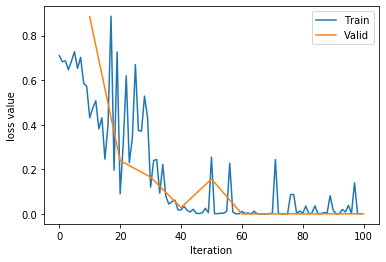

In [16]:
"""
# @file name  : ce_loss.py
# @author     : TingsongYu https://github.com/TingsongYu
# @date       : 2019-10-07 10:08:00
# @brief      : 人民币分类模型训练
"""
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
from PIL import Image
from matplotlib import pyplot as plt

from utils.lenet import LeNet
from utils.my_dataset import RMBDataset
from utils.common_tools import transform_invert, set_seed


set_seed(1)  # 设置随机种子
rmb_label = {"1": 0, "100": 1}

# 参数设置
MAX_EPOCH = 10
BATCH_SIZE = 16
LR = 0.01
log_interval = 10
val_interval = 1

# ============================ step 1/5 数据 ============================

split_dir = os.path.abspath(os.path.join("data", "rmb_split"))
if not os.path.exists(split_dir):
    raise Exception(r"数据 {} 不存在, 回到lesson-06\1_split_dataset.py生成数据".format(split_dir))
train_dir = os.path.join(split_dir, "train")
valid_dir = os.path.join(split_dir, "valid")

norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomGrayscale(p=0.8),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std),
])

valid_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(norm_mean, norm_std),
])

# 构建MyDataset实例
train_data = RMBDataset(data_dir=train_dir, transform=train_transform)
valid_data = RMBDataset(data_dir=valid_dir, transform=valid_transform)

# 构建DataLoder
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_data, batch_size=BATCH_SIZE)

# ============================ step 2/5 模型 ============================

net = LeNet(classes=2)
net.initialize_weights()

# ============================ step 3/5 损失函数 ============================
loss_functoin = nn.CrossEntropyLoss()                                                   # 选择损失函数

# ============================ step 4/5 优化器 ============================
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9)                        # 选择优化器
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)     # 设置学习率下降策略

# ============================ step 5/5 训练 ============================
train_curve = list()
valid_curve = list()

for epoch in range(MAX_EPOCH):

    loss_mean = 0.
    correct = 0.
    total = 0.

    net.train()
    for i, data in enumerate(train_loader):

        # forward
        inputs, labels = data
        outputs = net(inputs)

        # backward
        optimizer.zero_grad()
        loss = loss_functoin(outputs, labels)
        loss.backward()

        # update weights
        optimizer.step()

        # 统计分类情况
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).squeeze().sum().numpy()

        # 打印训练信息
        loss_mean += loss.item()
        train_curve.append(loss.item())
        if (i+1) % log_interval == 0:
            loss_mean = loss_mean / log_interval
            print("Training:Epoch[{:0>3}/{:0>3}] Iteration[{:0>3}/{:0>3}] Loss: {:.4f} Acc:{:.2%}".format(
                epoch, MAX_EPOCH, i+1, len(train_loader), loss_mean, correct / total))
            loss_mean = 0.

    scheduler.step()  # 更新学习率

    # validate the model
    if (epoch+1) % val_interval == 0:

        correct_val = 0.
        total_val = 0.
        loss_val = 0.
        net.eval()
        with torch.no_grad():
            for j, data in enumerate(valid_loader):
                inputs, labels = data
                outputs = net(inputs)
                loss = loss_functoin(outputs, labels)

                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).squeeze().sum().numpy()

                loss_val += loss.item()

            valid_curve.append(loss_val)
            print("Valid:\t Epoch[{:0>3}/{:0>3}] Iteration[{:0>3}/{:0>3}] Loss: {:.4f} Acc:{:.2%}".format(
                epoch, MAX_EPOCH, j+1, len(valid_loader), loss_val, correct / total))


train_x = range(len(train_curve))
train_y = train_curve

train_iters = len(train_loader)
valid_x = np.arange(1, len(valid_curve)+1) * train_iters*val_interval # 由于valid中记录的是epochloss，需要对记录点进行转换到iterations
valid_y = valid_curve

plt.plot(train_x, train_y, label='Train')
plt.plot(valid_x, valid_y, label='Valid')

plt.legend(loc='upper right')
plt.ylabel('loss value')
plt.xlabel('Iteration')
plt.show()

# ============================ inference ============================

test_dir = "test_data"

test_data = RMBDataset(data_dir=test_dir, transform=valid_transform)
valid_loader = DataLoader(dataset=test_data, batch_size=1)

for i, data in enumerate(valid_loader):
    # forward
    inputs, labels = data
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)

    rmb = 1 if predicted.numpy()[0] == 0 else 100

    img_tensor = inputs[0, ...]  # C H W
    img = transform_invert(img_tensor, train_transform)
    plt.imshow(img)
    plt.title("LeNet got {} Yuan".format(rmb))
    plt.show()
    plt.pause(0.5)
    plt.close()


Q:交叉熵代码演示？

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# fake data
inputs = torch.tensor([[1, 2], [1, 3], [1, 3]], dtype=torch.float)
target = torch.tensor([0, 1, 1], dtype=torch.long)

# ----------------------------------- CrossEntropy loss: reduction -----------------------------------

# def loss function
loss_f_none = nn.CrossEntropyLoss(weight=None, reduction='none')
loss_f_sum = nn.CrossEntropyLoss(weight=None, reduction='sum')
loss_f_mean = nn.CrossEntropyLoss(weight=None, reduction='mean')

# forward
loss_none = loss_f_none(inputs, target)
loss_sum = loss_f_sum(inputs, target)
loss_mean = loss_f_mean(inputs, target)

# view
print("Cross Entropy Loss:\n ", loss_none, loss_sum, loss_mean)

Cross Entropy Loss:
  tensor([1.3133, 0.1269, 0.1269]) tensor(1.5671) tensor(0.5224)


Q:通过手算校验pytorch的交叉熵代码的正确性代码？

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# fake data
inputs = torch.tensor([[1, 2], [1, 3], [1, 3]], dtype=torch.float)
target = torch.tensor([0, 1, 1], dtype=torch.long)

# --------------------------------- compute by hand

idx = 0

input_1 = inputs.detach().numpy()[idx]      # [1, 2]
target_1 = target.numpy()[idx]              # [0]

# 第一项
x_class = input_1[target_1]

# 第二项
sigma_exp_x = np.sum(list(map(np.exp, input_1)))
log_sigma_exp_x = np.log(sigma_exp_x)

# 输出loss
loss_1 = -x_class + log_sigma_exp_x

print("第一个样本loss为: ", loss_1)

第一个样本loss为:  1.3132617


Q:交叉熵的weight作用代码示例？

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# fake data
inputs = torch.tensor([[1, 2], [1, 3], [1, 3]], dtype=torch.float)
target = torch.tensor([0, 1, 1], dtype=torch.long)

# ----------------------------------- weight -----------------------------------
# def loss function
weights = torch.tensor([1, 2], dtype=torch.float)
# weights = torch.tensor([0.7, 0.3], dtype=torch.float)

loss_f_none_w = nn.CrossEntropyLoss(weight=weights, reduction='none')
loss_f_sum = nn.CrossEntropyLoss(weight=weights, reduction='sum')
loss_f_mean = nn.CrossEntropyLoss(weight=weights, reduction='mean')

# forward
loss_none_w = loss_f_none_w(inputs, target)
loss_sum = loss_f_sum(inputs, target)
loss_mean = loss_f_mean(inputs, target)

# view
print("weights: ", weights)
print(loss_none_w, loss_sum, loss_mean)

weights:  tensor([1., 2.])
tensor([1.3133, 0.2539, 0.2539]) tensor(1.8210) tensor(0.3642)


Q:交叉熵的weight作用手算校验代码示例？

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# fake data
inputs = torch.tensor([[1, 2], [1, 3], [1, 3]], dtype=torch.float)
target = torch.tensor([0, 1, 1], dtype=torch.long)

weights = torch.tensor([1, 2], dtype=torch.float)
weights_all = np.sum(list(map(lambda x: weights.numpy()[x], target.numpy())))  # [0, 1, 1]  # [1 2 2]

mean = 0
loss_sep = loss_none.detach().numpy()
for i in range(target.shape[0]):

    x_class = target.numpy()[i]
    tmp = loss_sep[i] * (weights.numpy()[x_class] / weights_all)
    mean += tmp

print(mean)

0.3641947731375694


Q:如何实现负对数似然函数中的负号功能？
- `torch.nn.NLLLoss(weight: Optional[torch.Tensor] = None, size_average=None, ignore_index: int = -100, reduce=None, reduction: str = 'mean')`
- weight：各类别的loss设置权值
- ignore_index：忽略某个类别
- reduction：计算模式，可为none/sum/mean
    - none：逐个元素计算
    - sum：所有元素求和，返回标量
    - mean：加权平均，返回标量

Q:NLLLoss代码示例？

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# fake data
inputs = torch.tensor([[1, 2], [1, 3], [1, 3]], dtype=torch.float)
target = torch.tensor([0, 1, 1], dtype=torch.long)

# ----------------------------------- 2 NLLLoss -----------------------------------
weights = torch.tensor([1, 1], dtype=torch.float)

loss_f_none_w = nn.NLLLoss(weight=weights, reduction='none')
loss_f_sum = nn.NLLLoss(weight=weights, reduction='sum')
loss_f_mean = nn.NLLLoss(weight=weights, reduction='mean')

# forward
loss_none_w = loss_f_none_w(inputs, target)
loss_sum = loss_f_sum(inputs, target)
loss_mean = loss_f_mean(inputs, target)

# view
print("weights: ", weights)
print("NLL Loss", loss_none_w, loss_sum, loss_mean)

weights:  tensor([1., 1.])
NLL Loss tensor([-1., -3., -3.]) tensor(-7.) tensor(-2.3333)


Q:二分类交叉熵是怎样？
- `torch.nn.BCELoss(weight: Optional[torch.Tensor] = None, size_average=None, reduce=None, reduction: str = 'mean')`
- weight：各类别的loss设置权值
- ignore_index：忽略某个类别
- reduction：计算模式，可为none/sum/mean
    - none：逐个元素计算
    - sum：所有元素求和，返回标量
    - mean：加权平均，返回标量
- 注意：输入值取值在[0,1]

Q:BCELoss代码示例？

In [27]:
inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)

target_bce = target

# itarget
inputs = torch.sigmoid(inputs)

weights = torch.tensor([1, 1], dtype=torch.float)

loss_f_none_w = nn.BCELoss(weight=weights, reduction='none')
loss_f_sum = nn.BCELoss(weight=weights, reduction='sum')
loss_f_mean = nn.BCELoss(weight=weights, reduction='mean')

# forward
loss_none_w = loss_f_none_w(inputs, target_bce)
loss_sum = loss_f_sum(inputs, target_bce)
loss_mean = loss_f_mean(inputs, target_bce)

# view
print("weights: ", weights)
print("BCE Loss", loss_none_w, loss_sum, loss_mean)

weights:  tensor([1., 1.])
BCE Loss tensor([[0.3133, 2.1269],
        [0.1269, 2.1269],
        [3.0486, 0.0181],
        [4.0181, 0.0067]]) tensor(11.7856) tensor(1.4732)


Q:BCELoss手算校验代码示例？

In [31]:
inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)

inputs = torch.sigmoid(inputs)

idx = 0

x_i = inputs.detach().numpy()[idx, idx]
y_i = target.numpy()[idx, idx]              #

# loss
# l_i = -[ y_i * np.log(x_i) + (1-y_i) * np.log(1-y_i) ]      # np.log(0) = nan
l_i = -y_i * np.log(x_i) if y_i else -(1-y_i) * np.log(1-x_i)

# 输出loss
print("BCE inputs: ", inputs)
print("第一个loss为: ", l_i)

BCE inputs:  tensor([[0.7311, 0.8808],
        [0.8808, 0.8808],
        [0.9526, 0.9820],
        [0.9820, 0.9933]])
第一个loss为:  0.31326166


Q:结合Sigmoid与二分类交叉熵
- `torch.nn.BCEWithLogitsLoss(weight: Optional[torch.Tensor] = None, size_average=None, reduce=None, reduction: str = 'mean', pos_weight: Optional[torch.Tensor] = None)`
- pos_weight：正样本的权值，用于均衡正负样本
- weight：各类别的loss设置权值
- ignore_index：忽略某个类别
- reduction：计算模式，可为none/sum/mean
    - none：逐个元素计算
    - sum：所有元素求和，返回标量
    - mean：加权平均，返回标量
- 注意：网络最后不加sigmoid函数

Q:BCEwithLogitsLoss的代码示例？

In [33]:
inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)

target_bce = target

# 不需要加sigmoid
# inputs = torch.sigmoid(inputs)

weights = torch.tensor([1, 1], dtype=torch.float)

loss_f_none_w = nn.BCEWithLogitsLoss(weight=weights, reduction='none')
loss_f_sum = nn.BCEWithLogitsLoss(weight=weights, reduction='sum')
loss_f_mean = nn.BCEWithLogitsLoss(weight=weights, reduction='mean')

# forward
loss_none_w = loss_f_none_w(inputs, target_bce)
loss_sum = loss_f_sum(inputs, target_bce)
loss_mean = loss_f_mean(inputs, target_bce)

# view
print("weights: ", weights)
print(loss_none_w, loss_sum, loss_mean)

weights:  tensor([1., 1.])
tensor([[0.3133, 2.1269],
        [0.1269, 2.1269],
        [3.0486, 0.0181],
        [4.0181, 0.0067]]) tensor(11.7856) tensor(1.4732)


Q:BCEwithLogitsLoss的pos_weight代码示例？

In [36]:
inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)

target_bce = target

# itarget
# inputs = torch.sigmoid(inputs)

weights = torch.tensor([1], dtype=torch.float)
pos_w = torch.tensor([3], dtype=torch.float)        # 3

loss_f_none_w = nn.BCEWithLogitsLoss(weight=weights, reduction='none', pos_weight=pos_w)
loss_f_sum = nn.BCEWithLogitsLoss(weight=weights, reduction='sum', pos_weight=pos_w)
loss_f_mean = nn.BCEWithLogitsLoss(weight=weights, reduction='mean', pos_weight=pos_w)

# forward
loss_none_w = loss_f_none_w(inputs, target_bce)
loss_sum = loss_f_sum(inputs, target_bce)
loss_mean = loss_f_mean(inputs, target_bce)

# view
print("pos_weights: ", pos_w)
print(loss_none_w, loss_sum, loss_mean)

pos_weights:  tensor([3.])
tensor([[0.9398, 2.1269],
        [0.3808, 2.1269],
        [3.0486, 0.0544],
        [4.0181, 0.0201]]) tensor(12.7158) tensor(1.5895)
